<a href="https://colab.research.google.com/github/theArcianCoder/geek2023/blob/playground/Learningtreeai_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import json
import random
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

# Load your dataset
with open("/content/training-final.json", "r") as json_file:
    dataset = json.load(json_file)

# Extract questions, answers, explanations, and tags
questions = [entry["question"] for entry in dataset]
answers = [entry["answer"] for entry in dataset]
explanations = [entry["explanation"] for entry in dataset]
tags = [" ".join(entry["tags"]) for entry in dataset]

# Create a TF-IDF vectorizer for tags
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(tags)

# Define a function to generate questions, answers, and explanations based on a tag and the number of questions
def generate_questions(tag, num_questions=5):
    # Calculate the cosine similarity between the input tag and all tags in the dataset
    tag_vector = tfidf_vectorizer.transform([tag])
    cosine_similarities = linear_kernel(tag_vector, tfidf_matrix).flatten()

    # Sort questions by similarity and select the top ones
    similar_questions_indices = cosine_similarities.argsort()[:-num_questions-1:-1]

    # Extract questions, answers, and explanations for selected questions
    selected_questions = [
        {
            "question": questions[i],
            "answer": answers[i],
            "explanation": explanations[i]
        }
        for i in similar_questions_indices
    ]

    # Randomly shuffle the selected questions
    random.shuffle(selected_questions)

    return selected_questions

# Get user input for the tag and number of questions
tag = input("Enter a tag: ")
num_questions = int(input("Enter the number of questions to generate: "))

# Generate and print questions, answers, and explanations based on user input
generated_questions = generate_questions(tag, num_questions)

if generated_questions:
    print(f"Generated Questions for Tag '{tag}':")
    for i, qna in enumerate(generated_questions, 1):
        print(f"{i}. Question: {qna['question']}")
        print(f"   Answer: {qna['answer']}")
        print(f"   Explanation: {qna['explanation']}\n")
else:
    print(f"No questions found for Tag '{tag}'. Please try another tag.")


Enter a tag: AWS
Enter the number of questions to generate: 30
Generated Questions for Tag 'AWS':
1. Question: What is the purpose of an AWS S3 bucket?
   Answer: To store and retrieve data objects in the cloud
   Explanation: An AWS S3 bucket is used to store and retrieve data objects in the cloud, providing scalable and durable object storage for various use cases.

2. Question: What is the primary benefit of using AWS RDS for database management?
   Answer: Managed database service with automated backups, scaling, and high availability
   Explanation: AWS RDS provides a managed database service with automated backups, scaling, and high availability, reducing the operational overhead of managing database infrastructure.

3. Question: What is the primary benefit of using AWS Lambda?
   Answer: Serverless execution of code without the need to provision or manage servers
   Explanation: AWS Lambda allows for serverless execution of code without the need to provision or manage servers, e

Enter your Student ID: 123
Test Questions:
Question 1:
What is the primary goal of Infrastructure as Code (IAC) in DevOps?
Question 2:
What is the purpose of a Jenkinsfile in a Jenkins pipeline?
Question 3:
What is the purpose of a Kubernetes ServiceAccount?
Question 4:
What is the primary benefit of using AWS ECS for container orchestration?
Question 5:
What does VPC stand for in the context of AWS?
Question 6:
What is the purpose of a Git merge?
Question 7:
What is the primary goal of a UX Designer?
Question 8:
What is the primary goal of Infrastructure as Code (IAC) in DevOps?
Question 9:
What is the purpose of a Git rebase?
Question 10:
What is the purpose of a Kubernetes ServiceAccount?
Question 11:
What is the purpose of a Git tag?
Question 12:
What is the purpose of a Kubernetes Secret?
Question 13:
What is the purpose of a Git merge?
Question 14:
What is the main benefit of using Git branching strategies?
Question 15:
What is the primary goal of a Quality Assurance (QA) Enginee

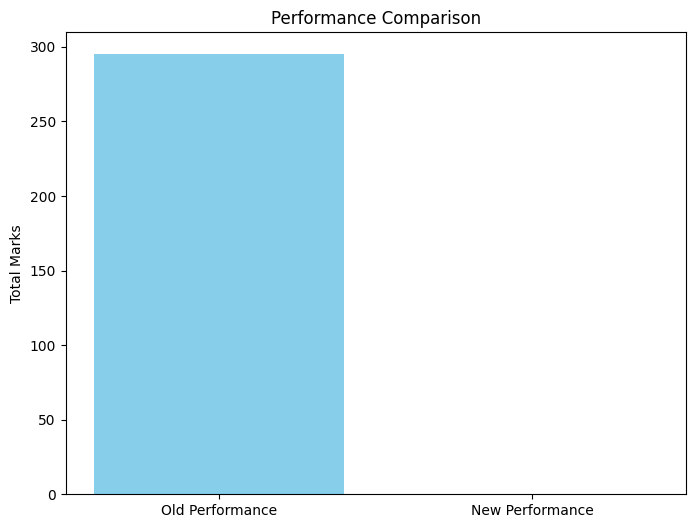

In [8]:
import random
import json
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
import matplotlib.pyplot as plt

# Load your dataset
with open("training-final.json", "r") as json_file:
    dataset = json.load(json_file)

# Extract questions, answers, explanations, and tags
questions = [entry["question"] for entry in dataset]
answers = [entry["answer"] for entry in dataset]
explanations = [entry["explanation"] for entry in dataset]
tags = [" ".join(entry["tags"]) for entry in dataset]

# Create a TF-IDF vectorizer for tags
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(tags)

# Define a function to generate unique questions based on a tag and the number of questions
def generate_unique_questions(tag, num_questions=5):
    # Calculate the cosine similarity between the input tag and all tags in the dataset
    tag_vector = tfidf_vectorizer.transform([tag])
    cosine_similarities = linear_kernel(tag_vector, tfidf_matrix).flatten()

    # Sort questions by similarity
    similar_questions_indices = cosine_similarities.argsort()[::-1]

    unique_questions = set()
    selected_questions = []

    for i in similar_questions_indices:
        question = questions[i]
        if question not in unique_questions:
            selected_questions.append(question)
            unique_questions.add(question)

        if len(selected_questions) == num_questions:
            break

    return selected_questions

# Function to generate test questions
def generate_test_questions(student_marks):
    test = []
    # Find the subject/tag with the lowest score
    lowest_score_subject = min(student_marks, key=student_marks.get)

    # Generate more questions for the lowest scoring subject/tag
    num_questions_lowest = 10  # Generate more questions for the lowest scoring subject
    num_questions_other = 2   # Generate fewer questions for other subjects

    for subject, marks in student_marks.items():
        if subject == lowest_score_subject:
            num_questions = num_questions_lowest
        else:
            num_questions = num_questions_other

        # Use the ML model to generate unique questions for each subject
        subject_questions = generate_unique_questions(subject, num_questions)
        test.extend([(q, a) for q in subject_questions for a in answers])

    # Shuffle the test questions
    random.shuffle(test)

    # Ensure there are exactly 30 questions in the test
    test = test[:30]

    return test

# Function to assess performance
def assess_performance(test, student_answers):
    student_score = 0
    for question, correct_answer in test:
        if student_answers.get(question) == correct_answer:
            student_score += 10  # Each correct answer is worth 10 marks
    return student_score

# Sample student marks (you can replace this with actual data)
student_marks = {
    'Kubernetes': 70,
    'Git': 55,
    'Helm': 80,
    'AWS': 90,
}

# Input: Student ID (you can replace this with actual student IDs)
student_id = input("Enter your Student ID: ")

# Generate the test questions
test = generate_test_questions(student_marks)

# Print the test questions
print("Test Questions:")
for i, (question, _) in enumerate(test, start=1):
    print(f"Question {i}:\n{question}")

# Input: Student's answers
print("\nEnter your answers (provide answers in the format 'Answer' for each question):")
student_responses = {}
for question, _ in test:
    response = input(f"{question}\nYour Answer: ").strip()
    student_responses[question] = response

# Assess the student's performance
student_score = assess_performance(test, student_responses)

# Print the student's score
print(f"\nStudent's Score: {student_score} / {len(test) * 10}")  # Assuming 10 marks per question

# Visualization: Compare old and new performance
old_score = sum(student_marks.values())
new_score = student_score
labels = ['Old Performance', 'New Performance']
scores = [old_score, new_score]

plt.figure(figsize=(8, 6))
plt.bar(labels, scores, color=['skyblue', 'lightgreen'])
plt.ylabel('Total Marks')
plt.title('Performance Comparison')
plt.show()



In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
